In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

/Users/abc10946/Learnings/keras-learning/env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=input_shape,activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(convOut2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
__________

In [6]:
model.compile(optimizer='RMSprop',loss='categorical_crossentropy')
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 205s 3ms/step - loss: 0.2342 - val_loss: 0.0542
Epoch 2/12
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0827 - val_loss: 0.0370
Epoch 3/12
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0630 - val_loss: 0.0349
Epoch 4/12
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0531 - val_loss: 0.0356
Epoch 5/12
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0495 - val_loss: 0.0310
Epoch 6/12
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0455 - val_loss: 0.0357
Epoch 7/12
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0451 - val_loss: 0.0306
Epoch 8/12
60000/60000 [==============================] - 186s 3ms/step - loss: 0.0460 - val_loss: 0.0369
Epoch 9/12
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0479 - val_loss: 0.0

In [7]:
model.save("trained_model")

In [10]:
(x_train_, y_train_), (x_test_, y_test_) = mnist.load_data()

In [50]:
import matplotlib.pyplot as plt
import numpy as np

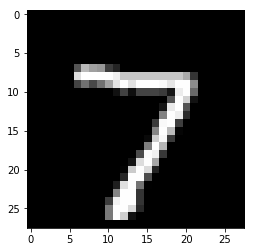

In [51]:
plt.imshow(x_test_[0],'gray')

In [13]:
predicts = model.predict(x_test)
print(predicts[0])

[2.8558551e-12 5.2560545e-10 2.3834593e-08 1.2507211e-08 2.3605000e-11
 9.6831501e-12 1.0333939e-15 1.0000000e+00 1.3694424e-11 2.2091925e-08]


In [14]:
print("model prediction of x_test[0] is",np.argmax(predicts[0]))

model prediction of x_test[0] is 7


In [15]:
predicts_num = np.array([np.argmax(x) for x in predicts])
type(predicts_num)

numpy.ndarray

In [16]:
type(y_test_)

numpy.ndarray

In [17]:
print("accuracy is",np.sum(predicts_num == y_test_)/len(y_test_) * 100,"%")

accuracy is 98.87 %


In [60]:
failds = np.argwhere(predicts_num != y_test_)
print(len(failds))
print(failds[0:9].shape)
print(x_test_.shape)

113
(9, 1)
(10000, 28, 28)


correct:predict


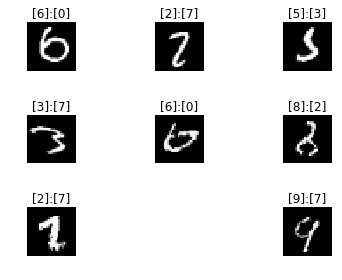

In [82]:
pos = 1
print("correct:predict")
for i in failds[0:9]:
    plt.tight_layout()
    plt.subplot(3,3,pos)
    plt.imshow(x_test_[i][0],'gray')
    correct_label = y_test_[i]
    predict_label = predicts_num[failds[pos-1]]
    plt.title(str(correct_label)+':'+str(predict_label))
    pos += 1
    plt.axis('off')